In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('../data/titanic_train.csv')
test = pd.read_csv('../data/titanic_test.csv')
subm = test[['PassengerId']]

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
def clean1(df):
    
    Title = []
    for name in df['Name']:
        if 'Mr.' in name:
            Title.append('Mr')
        elif 'Mrs.' in name:
            Title.append('Mrs')
        elif "Miss." in name:
            Title.append("Miss")
        elif "Master." in name:
            Title.append("Master")
        elif "Rev." in name:
            Title.append("Rev")
        elif "Don." in name:
            Title.append("Don")
        elif "Dr." in name:
            Title.append("Dr")
        elif "Mme." in name:
            Title.append("Miss")
        elif "Ms." in name:
            Title.append("Mrs")
        elif "Major." in name:
            Title.append("Major")
        elif "Mrs" in name:
            Title.append("Mrs")
        elif "Mr" in name:
            Title.append("Mr")
        elif "Mlle." in name:
            Title.append("Miss")
        elif "Col." in name:
            Title.append("Col")
        elif "Capt." in name:
            Title.append("Capt")
        elif "Countess." in name:
            Title.append("Countess")
        elif "Jonkheer." in name:
            Title.append("Jonkheer")
        else:
            Title.append("Other")
        
    df['Title'] = Title
    
    df = df.astype({'Pclass' : str,})
    
    df['Age'] = round(df['Age'])
    
    df = df.drop(columns = ['PassengerId', 'Name', 'Cabin'])
    
    return df
        
        

In [5]:
train = clean1(train)
test = clean1(test)

In [6]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
Title         0
dtype: int64

In [7]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
Title        0
dtype: int64

In [8]:
train[train.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
61,1,1,female,38.0,0,0,113572,80.0,NaN,Miss
829,1,1,female,62.0,0,0,113572,80.0,NaN,Mrs


In [9]:
ind = train[train['Embarked'].isnull()].index
train.loc[ind, 'Embarked'] = 'S'

In [10]:
test[test['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
152,3,male,60.0,0,0,3701,NaN,S,Mr


In [11]:
import seaborn as sns

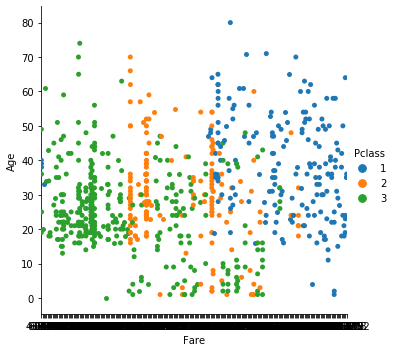

In [18]:
sns.catplot(x = 'Fare', y = 'Age', hue = 'Pclass', data = train)

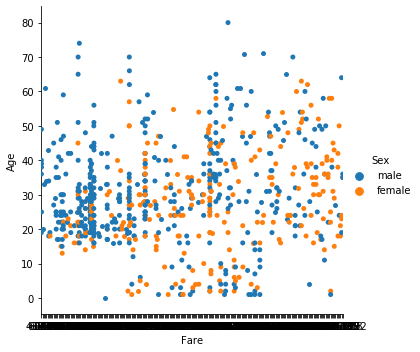

In [13]:
sns.catplot(x = 'Fare', y = 'Age', hue = 'Sex', data = train)

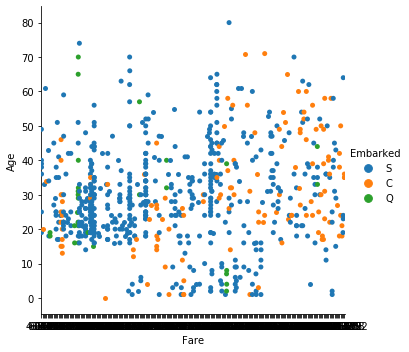

In [17]:
sns.catplot(x = 'Fare', y = 'Age', hue = 'Embarked', data = train)

In [19]:
fare = np.nanmean(train['Fare'][
    (train['Age'] > 45) & (train['Age'] < 75) &
    (train['Sex'] == 'male') & 
    (train['Pclass'] == '3') &
    (train['Embarked'] == 'S')
])

ind = test[test['Fare'].isnull()].index
test.loc[ind, 'Fare'] = fare

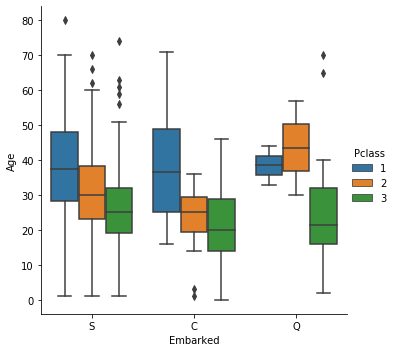

In [21]:
sns.catplot(x = 'Embarked', y = 'Age', hue = 'Pclass', kind = 'box', data = train);

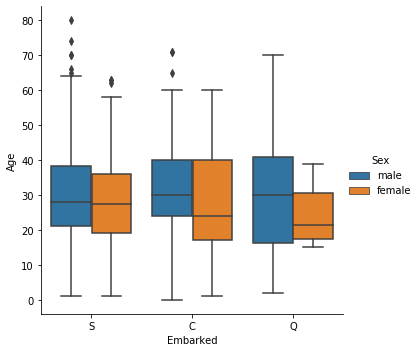

In [22]:
sns.catplot(x = 'Embarked', y = 'Age', hue = 'Sex', kind = 'box', data = train);

In [23]:


def clean2(df, train):
    ind = df[df["Age"].isnull()].index
    for i in ind:
        emb = df.loc[i]["Embarked"]
        pc = df.loc[i]["Pclass"]
        sex = df.loc[i]["Sex"]
        
        age = np.nanmedian(train["Age"][(train["Embarked"] == emb) & (train["Pclass"] == pc) & (train["Sex"] == sex)])
        df.loc[i, "Age"] = age

    return(df)



In [24]:
train = clean2(train, train)

In [25]:
test = clean2(test, train)

In [27]:
from collections import defaultdict
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [35]:
import matplotlib.pyplot as plt

In [28]:
cols = ["Sex", "Embarked", "Pclass"]
    
train_temp = train[cols]
train_ind = train_temp.index
    
test_temp = test[cols]
test_ind = test_temp.index
    
enc = OneHotEncoder(drop = "first")
# To avoid multi-collinearlty (dummy variable trap) due to one-hot-encoding, use drop = "first"
enc.fit(train_temp)
        
train_hot = enc.transform(train_temp).toarray()
train_hot = pd.DataFrame(train_hot, columns = enc.get_feature_names(cols), index = train_ind)
train = train.drop(columns = ["Sex"])
train = pd.concat([train, train_hot], axis = 1)
    
test_hot = enc.transform(test_temp).toarray()
test_hot = pd.DataFrame(test_hot, columns = enc.get_feature_names(cols), index = test_ind)
test = test.drop(columns = ["Sex"])
test = pd.concat([test, test_hot], axis = 1)

In [29]:
def GetFreqMap(train_data):
    cols = ["Embarked", "Ticket", "Title", "Pclass"]
    MyMap = {}
    for col in cols:
        temp = {}
        temp = train_data[col].value_counts()/train_data.shape[0]
        temp = defaultdict(lambda : 0, temp)
        MyMap[col] = temp
    
    return MyMap 

In [30]:
def GetMeanMap(train_data):
    cols = ["Embarked", "Ticket", "Title", "Pclass"]
    MyMap = {}
    for col in cols:
        temp = {}
        categories = train_data[col].value_counts().keys()
        for cat in categories:
            n1 = train_data[col][(train_data[col] == cat) & (train_data["Survived"] == 1)].shape[0]
            n2 = train_data[col][(train_data[col] == cat)].shape[0]
            temp[cat] = n1/n2
        
        temp = defaultdict(lambda : 0, temp)
        MyMap[col] = temp
        
    return MyMap

In [31]:


def MapMe(df, FM, MM):
    temp_freq = pd.DataFrame()
    temp_mean = pd.DataFrame()
    
    cols = ["Embarked", "Ticket", "Title", "Pclass"]
    for col in cols:
        temp_freq[col + "_freq"] = df[col].map(FM[col])
        temp_mean[col + "_mean"] = df[col].map(MM[col])
        
    df = pd.concat([df, temp_freq, temp_mean], axis = 1)
    df = df.drop(columns = ["Embarked", "Ticket", "Title", "Pclass"])
    
    return df



In [32]:
FM = GetFreqMap(train)
MM = GetMeanMap(train)
train = MapMe(train, FM, MM)
test = MapMe(test, FM, MM)

In [33]:


train_data = train.loc[:, train.columns != "Survived"]
train_labels = train[["Survived"]]
test_data = test

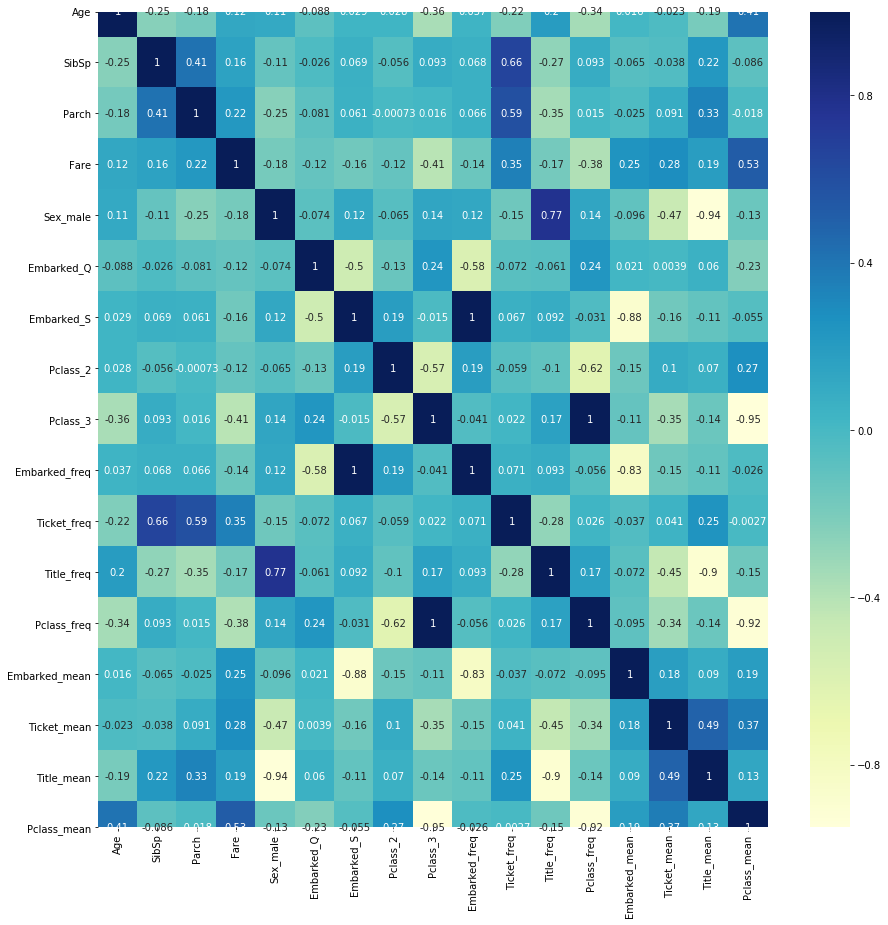

In [36]:
plt.figure(figsize = (15, 15))
sns.heatmap(train_data.corr(), cmap = "YlGnBu", annot = True);

In [38]:
test_data

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Embarked_freq,Ticket_freq,Title_freq,Pclass_freq,Embarked_mean,Ticket_mean,Title_mean,Pclass_mean
0,34.0,0,0,7.8292,1.0,1.0,0.0,0.0,1.0,0.086420,0.000000,0.581369,0.551066,0.389610,0.0,0.158301,0.242363
1,47.0,1,0,7.0000,0.0,0.0,1.0,0.0,1.0,0.725028,0.000000,0.143659,0.551066,0.339009,0.0,0.796875,0.242363
2,62.0,0,0,9.6875,1.0,1.0,0.0,1.0,0.0,0.086420,0.000000,0.581369,0.206510,0.389610,0.0,0.158301,0.472826
3,27.0,0,0,8.6625,1.0,0.0,1.0,0.0,1.0,0.725028,0.000000,0.581369,0.551066,0.339009,0.0,0.158301,0.242363
4,22.0,1,1,12.2875,0.0,0.0,1.0,0.0,1.0,0.725028,0.001122,0.143659,0.551066,0.339009,1.0,0.796875,0.242363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,25.0,0,0,8.0500,1.0,0.0,1.0,0.0,1.0,0.725028,0.000000,0.581369,0.551066,0.339009,0.0,0.158301,0.242363
414,39.0,0,0,108.9000,0.0,0.0,0.0,0.0,0.0,0.188552,0.002245,0.000000,0.242424,0.553571,0.5,0.000000,0.629630
415,38.0,0,0,7.2500,1.0,0.0,1.0,0.0,1.0,0.725028,0.000000,0.581369,0.551066,0.339009,0.0,0.158301,0.242363
416,25.0,0,0,8.0500,1.0,0.0,1.0,0.0,1.0,0.725028,0.000000,0.581369,0.551066,0.339009,0.0,0.158301,0.242363


In [39]:
train_data = train_data.drop(columns = ['Pclass_3', 'Embarked_S'])
test_data = test_data.drop(columns = ['Pclass_3', 'Embarked_S'])

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [42]:
def ModelAccuracy(model, train_data, train_labels):
    train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.3,)
    
    if model == 'RandomForest':
        classifier = RandomForestClassifier(n_estimators = 100)
    
    classifier.fit(train_data, train_labels.values.ravel())
    prediction = classifier.predict(test_data)
    
    accuracy = metrics.accuracy_score(test_labels, prediction)
    return accuracy

In [ ]:
model = 'RandomForest'
accuracy = ModelAccuracy(model, train_data, train_labels)

In [43]:
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(train_data, train_labels.values.ravel())
prediction = classifier.predict(test_data)

In [44]:
prediction

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [45]:
subm

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [46]:
subm['Survived'] = prediction

In [48]:
subm.to_csv('subm.csv', index=False)